In [3]:
from anndata import AnnData
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.sparse
import os

%matplotlib inline

In [4]:
sparsity_levels = [0.5, 0.6, 0.7, 0.8, 0.9]
disk_usage_dense = []
disk_usage_sparse = []

for i, level in enumerate(sparsity_levels):
    D = np.random.rand(20000, 4000)
    D[D<level]=0
    
    AnnData(D).write('./dense_temp.h5ad')
    disk_usage_dense.append(int(os.path.getsize('./dense_temp.h5ad')/10**6))
    
    if os.path.isfile('./dense_temp.h5ad'):
        os.remove('./dense_temp.h5ad')
        
    AnnData(sp.sparse.csr_matrix(D)).write('./sparse_temp.h5ad')
    disk_usage_sparse.append(int(os.path.getsize('./sparse_temp.h5ad')/10**6))
    
    if os.path.isfile('./sparse_temp.h5ad'):
        os.remove('./sparse_temp.h5ad')
        
del D

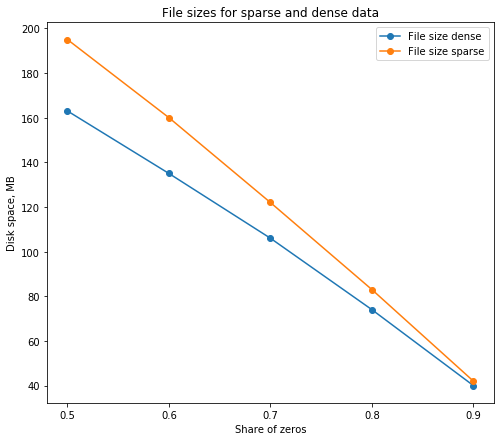

In [5]:
x = np.arange(len(sparsity_levels))

plt.figure(figsize=(8, 7))

plt.plot(x, disk_usage_dense, marker='o', label='File size dense')
plt.plot(x, disk_usage_sparse, marker='o', label='File size sparse')

plt.xticks(x, sparsity_levels)
plt.title('File sizes for sparse and dense data')
plt.xlabel('Share of zeros')
plt.ylabel('Disk space, MB')
plt.legend()

plt.show()